# Lab 1: Building a Feed Forward Neural Network (FNN)
**Objective**: To build, train, and evaluate a simple Feed Forward Neural Network using TensorFlow/Keras to classify handwritten digits from the MNIST dataset.

### 1. Import Necessary Libraries
We import TensorFlow and Keras modules for building the neural network, and Matplotlib for visualizing the training results.

In [1]:
import tensorflow as tf 
from tensorflow.keras import models , layers
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt 

### 2. Load the Dataset
We use the MNIST dataset, which contains 60,000 training images and 10,000 testing images of handwritten digits (0-9).

In [2]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

### 3. Explore Data Structure
Checking the shape of the dataset to understand the input dimensions.
*   **Training Data**: 60,000 images, 28x28 pixels each.
*   **Testing Data**: 10,000 images, 28x28 pixels each.

In [3]:
print("Training data shape: " , x_train.shape)
print("Testing data shape: " , x_test.shape)

Training data shape:  (60000, 28, 28)
Testing data shape:  (10000, 28, 28)


### 4. Data Preprocessing
*   **Flattening**: We reshape the 2D images (28x28) into 1D vectors (784 features) because standard Dense layers expect 1D input.
*   **Normalization**: We divide the pixel values by 255.0 to scale them between 0 and 1. This helps the neural network converge faster during training.

In [4]:
x_train = x_train.reshape(60000 , 784)
x_test = x_test.reshape(10000 , 784)

x_train = x_train/255.0
x_test = x_test/255.0


### 5. Define the Model Architecture
We build a Sequential model with three layers:
1.  **Hidden Layer 1**: Dense layer with 128 neurons and `relu` activation.
2.  **Hidden Layer 2**: Dense layer with 64 neurons and `relu` activation.
3.  **Output Layer**: Dense layer with 10 neurons and `softmax` activation (outputs probability distribution across the 10 digit classes).

In [5]:
model = models.Sequential()

model.add(layers.Dense(128 , activation='relu' , input_shape=(784,)))
model.add(layers.Dense(64 , activation='relu'))
model.add(layers.Dense(10 , activation='softmax'))


c:\Users\Saniya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 6. Compile the Model
We configure the training process:
*   **Optimizer**: SGD (Stochastic Gradient Descent) with a learning rate of 0.01.
*   **Loss Function**: `sparse_categorical_crossentropy` (suitable for multi-class classification with integer labels).
*   **Metrics**: Accuracy.

In [6]:
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
    )

### 7. Train the Model
We train the model on the training data for 10 epochs using a batch size of 32. We also use 10% of the training data as a validation set to monitor performance during training.

In [7]:
history = model.fit(x_train , y_train , epochs=10 , batch_size=32 , validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8238 - loss: 0.6692 - val_accuracy: 0.9263 - val_loss: 0.2804
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9119 - loss: 0.3094 - val_accuracy: 0.9385 - val_loss: 0.2262
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9273 - loss: 0.2570 - val_accuracy: 0.9492 - val_loss: 0.1909
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9363 - loss: 0.2237 - val_accuracy: 0.9550 - val_loss: 0.1718
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9426 - loss: 0.1979 - val_accuracy: 0.9615 - val_loss: 0.1517
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9485 - loss: 0.1780 - val_accuracy: 0.9610 - val_loss: 0.1462
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9533 - loss: 0.1616 - val_accuracy: 0.9637 - val_loss: 0.1316
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9579 - loss: 0.1473 - 

### 8. Evaluate on Test Data
We verify the model's performance on the unseen test dataset to check for overfitting and general accuracy.

In [8]:
test_loss , test_accuracy = model.evaluate(x_test ,y_test)

print("Test Loss: " , test_loss)
print("Test Accuracy: " , test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9585 - loss: 0.1371
Test Loss:  0.13705110549926758
Test Accuracy:  0.9585000276565552


### 9. Visualize Training History
We plot the training/validation loss and accuracy trends to analyze how well the model learned over the epochs.

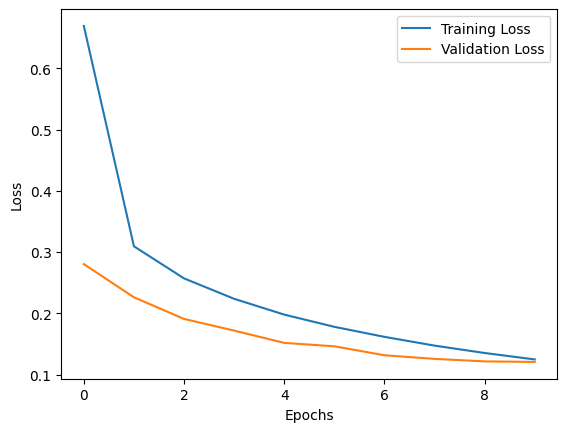

In [9]:
plt.figure()
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


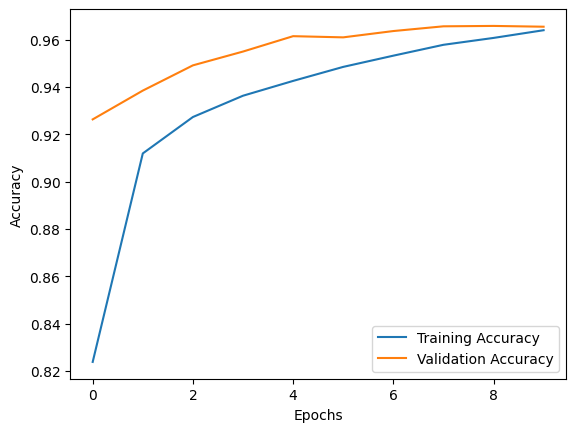

In [10]:
plt.figure()
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### 10. Test on a Single Image
Finally, let's visually verify the model's performance on a random sample from the test set.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


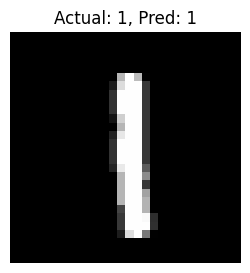

Model Prediction: 1


In [12]:
import numpy as np

# Select a random index from the test set
index = np.random.randint(0, x_test.shape[0])

# Select the image
img = x_test[index]

# Predict (need to reshape to (1, 784) for the model)
prediction = model.predict(img.reshape(1, 784))
predicted_label = np.argmax(prediction)

# Get actual label
actual_label = y_test[index]

# Display
plt.figure(figsize=(3, 3))
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"Actual: {actual_label}, Pred: {predicted_label}")
plt.axis('off')
plt.show()

print(f"Model Prediction: {predicted_label}")